<a href="https://colab.research.google.com/github/fercouri/Resistencia-dos-Materiais/blob/main/resmat1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Resolução questão 1:


  
    
    parâmetro forcas: Lista de tuplas (F, θ), onde:
             F é a intensidade da força,
             θ é o ângulo da força em graus em relação ao eixo x positivo.
    return: Tupla (R, θr), onde:
             R é a intensidade da força resultante,
             θr é o ângulo da força resultante em graus em relação ao eixo x positivo.


In [ ]:
import math

def calcular_resultante(forcas):
    # Componentes resultantes no eixo x e y
    Rx = 0
    Ry = 0

    for F, theta in forcas:
        # Converte o ângulo para radianos
        rad = math.radians(theta)
        # Calcula os componentes x e y
        Rx += F * math.cos(rad)
        Ry += F * math.sin(rad)

    # Intensidade da força resultante
    R = math.sqrt(Rx*2 + Ry*2)

    # Direção da força resultante (em graus)
    theta_r = math.degrees(math.atan2(Ry, Rx))

    return R, theta_r

def main():
    print("Cálculo da força resultante para forças coplanares concorrentes.")
    n = int(input("Digite o número de forças: "))

    forcas = []
    for i in range(n):
        print(f"\nForça {i + 1}:")
        F = float(input("Digite a intensidade da força (N): "))
        theta = float(input("Digite o ângulo da força (graus em relação ao eixo x positivo): "))
        forcas.append((F, theta))

    R, theta_r = calcular_resultante(forcas)
    print("\nResultados:")
    print(f"Força resultante: {R:.2f} N")
    print(f"Direção da resultante: {theta_r:.2f}°")

if __name__ == "__main__":
    main()

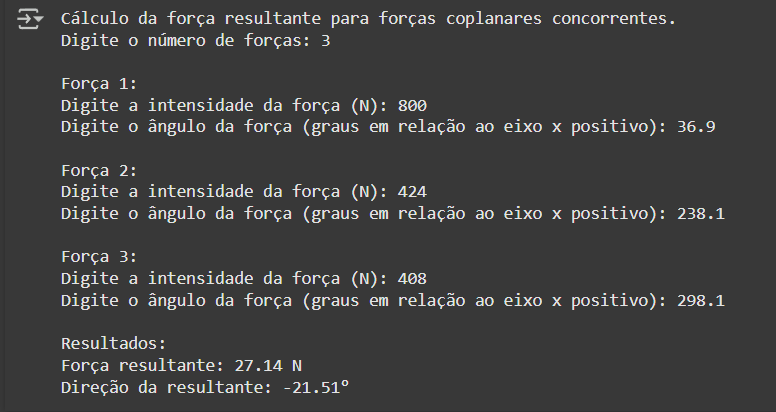

Testando o código, o exemplo 1 dado tem resultado igual a Força Resultante = 27.14N e ângulo de -21.51°.

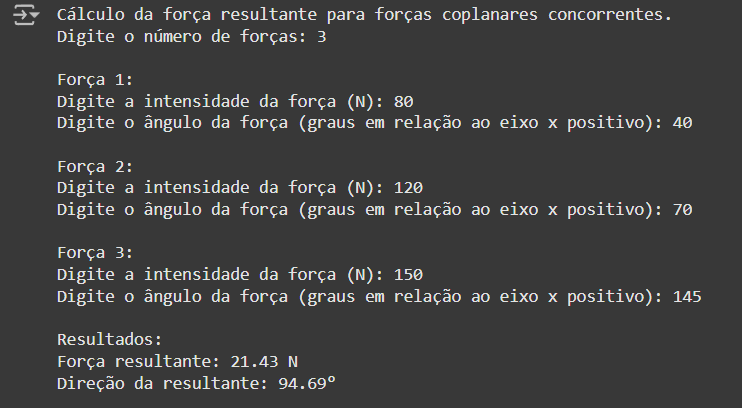

Já no exemplo 2, Força Resultante = 21.43N e ângulo de 94.69°.

O código não tem limitação para a quantidade de forças atuantes, mas necessita de um entendimento básico do assunto. O usuário precisará fazer os cálculos para fornecer o ângulo em graus, seja talvez convertendo de radianos ou obtendo-o a partir dos dados de distância fornecidos.


### Resolução questão 2:

  Calcula as reações de apoio em uma viga biapoiada submetida a carregamentos pontuais e distribuídos.

    parâmetro cargas: Lista de tuplas (F, x), onde:
             F é a intensidade da carga pontual (em N),
             x é a distância da carga até o apoio A (em metros).
    parâmetro carregamentos_distribuidos: Lista de tuplas (q, a, b), onde:
             q é a intensidade do carregamento distribuído (N/m),
             a é a posição inicial do carregamento em relação ao apoio A(m),
             b é a posição final do carregamento em relação ao apoio A (m).
    parâmetro comprimento: Comprimento total da viga (em metros).
    return: Tupla (RA, RB), onde:
             RA é a reação no apoio A (em N),
             RB é a reação no apoio B (em N).

In [ ]:
import math

def calcular_reacoes(cargas, carregamentos_distribuidos, comprimento):

    # Somatório de forças pontuais
    soma_forcas_pontuais = sum(F for F, _ in cargas)
    # Somatório de momentos gerados pelas forças pontuais
    soma_momentos_pontuais = sum(F * x for F, x in cargas)

    # Somatório de forças e momentos gerados por carregamentos distribuídos
    soma_forcas_distribuidas = 0
    soma_momentos_distribuidos = 0
    for q, a, b in carregamentos_distribuidos:
        comprimento_carregamento = b - a
        forca_total = q * comprimento_carregamento  # Força total equivalente do carregamento
        posicao_resultante = a + comprimento_carregamento / 2  # Posição da força resultante
        soma_forcas_distribuidas += forca_total
        soma_momentos_distribuidos += forca_total * posicao_resultante

    # Força total e momento total
    soma_forcas = soma_forcas_pontuais + soma_forcas_distribuidas
    soma_momentos_A = soma_momentos_pontuais + soma_momentos_distribuidos

    # Reação no apoio B (RB)
    RB = soma_momentos_A / comprimento

    # Reação no apoio A (RA)
    RA = soma_forcas - RB

    return RA, RB

def main():
    print("Cálculo das reações de apoio em uma viga biapoiada.")
    comprimento = float(input("Digite o comprimento da viga (em metros): "))

    # Entrada de forças pontuais
    n_pontuais = int(input("Digite o número de forças pontuais: "))
    cargas = []
    for i in range(n_pontuais):
        print(f"\nForça pontual {i + 1}:")
        F = float(input("Digite a intensidade da carga (em N): "))
        x = float(input(f"Digite a posição da carga em relação ao apoio A (0 a {comprimento} m): "))
        cargas.append((F, x))

    # Entrada de carregamentos distribuídos
    n_distribuidos = int(input("\nDigite o número de carregamentos distribuídos: "))
    carregamentos_distribuidos = []
    for i in range(n_distribuidos):
        print(f"\nCarregamento distribuído {i + 1}:")
        q = float(input("Digite a intensidade do carregamento (em N/m): "))
        a = float(input(f"Digite a posição inicial do carregamento (0 a {comprimento} m): "))
        b = float(input(f"Digite a posição final do carregamento (0 a {comprimento} m): "))
        carregamentos_distribuidos.append((q, a, b))

    # Cálculo das reações
    RA, RB = calcular_reacoes(cargas, carregamentos_distribuidos, comprimento)

    # Resultados
    print("\nResultados:")
    print(f"Reação no apoio A (RA): {RA:.2f} N")
    print(f"Reação no apoio B (RB): {RB:.2f} N")

if __name__ == "__main__":
    main()

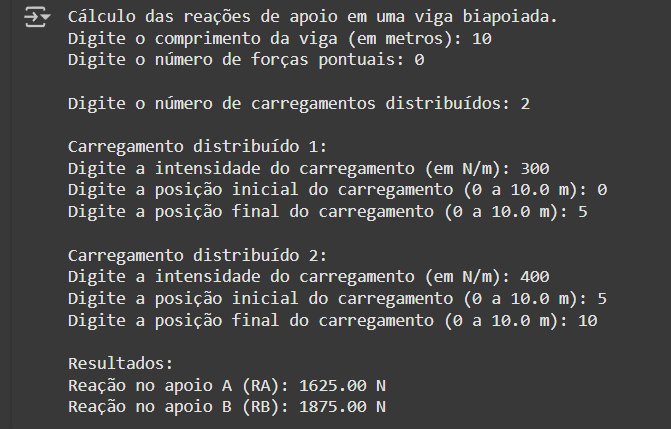

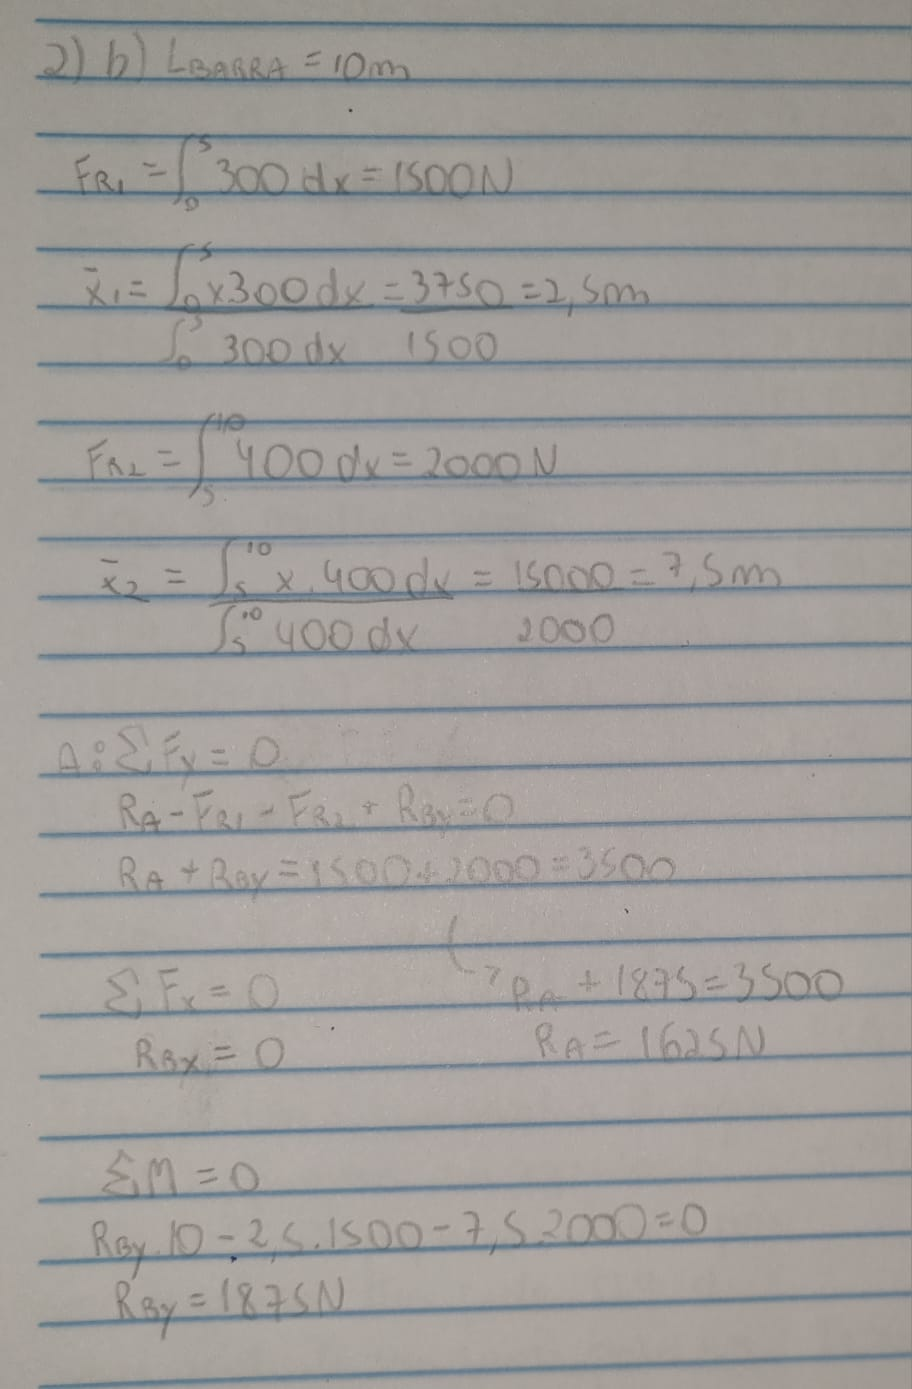

Resolvendo a letra B, o código retorna que a reação no apoio A é 1625N e no B, 1875N. Resolvendo no papel, encontra-se o mesmo resultado.

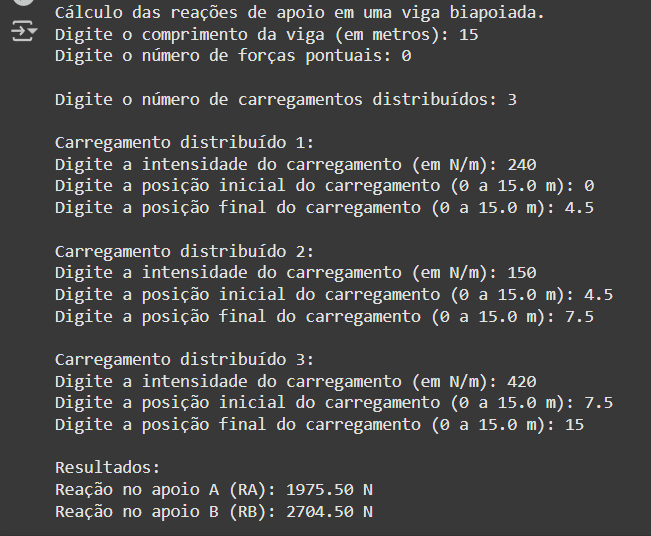

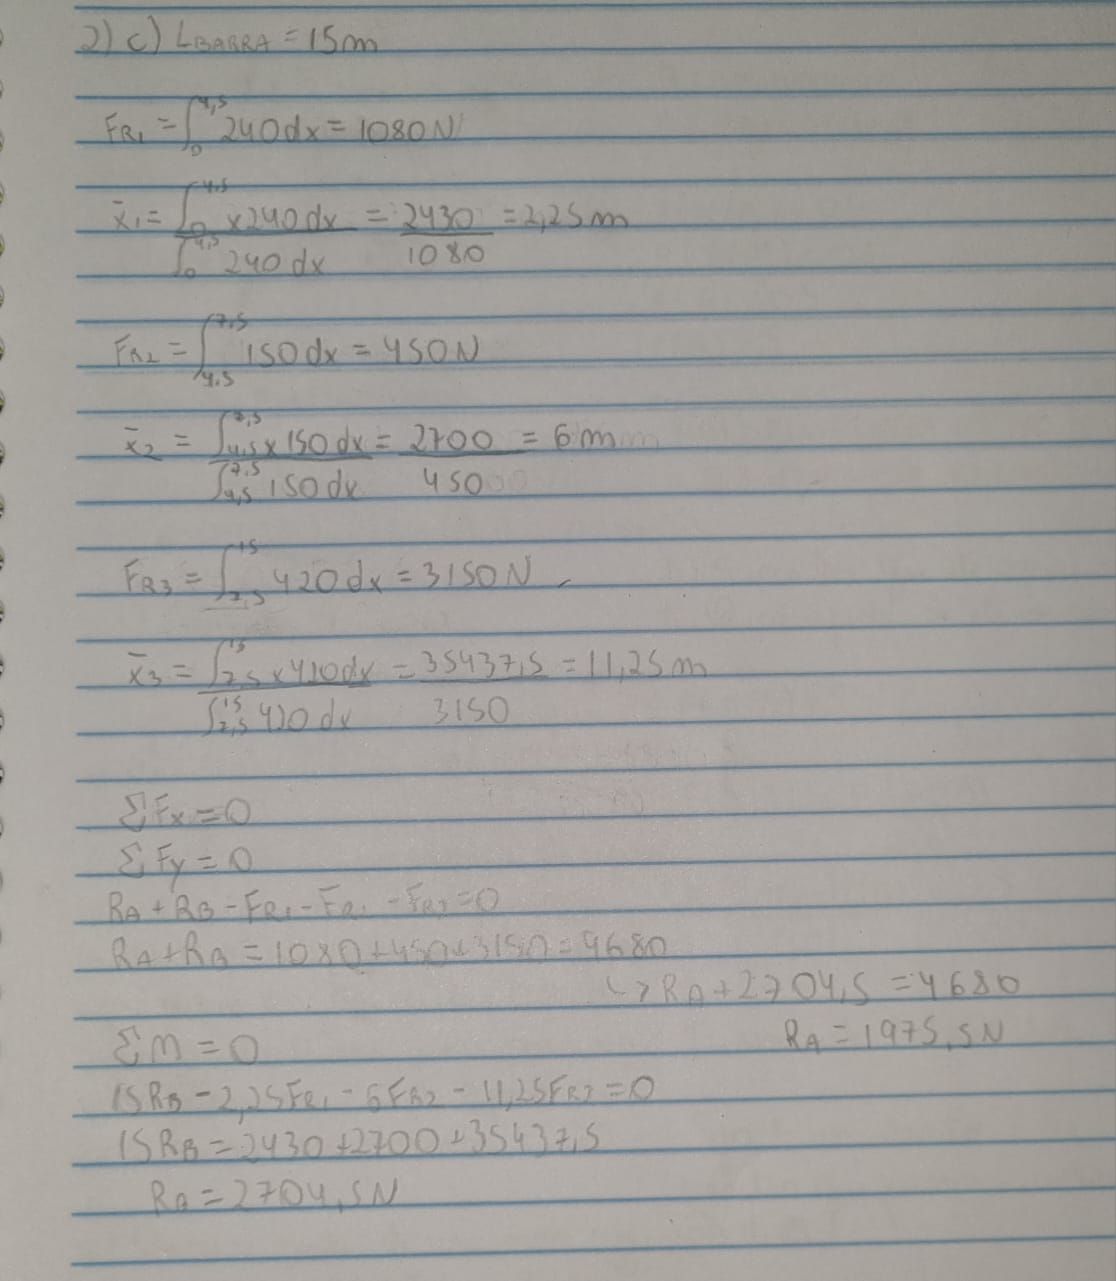

Resolvendo a letra C, o código retorna que a reação no apoio A é 1975.5N e no B, 2704.5N. Resolvendo no papel, encontra-se o mesmo resultado.


### Resolução questão 3:

Calcula as forças em uma treliça plana isostática.



    parâmetro nos: Dicionário com coordenadas dos nós, {nó: (x, y)}.
    parâmetro barras: Lista de tuplas [(nó1, nó2), ...] representando as barras.
    parâmetro forcas: Dicionário com forças externas aplicadas, {nó: (Fx, Fy)}.
    parâmetro apoios: Dicionário com restrições nos apoios, {nó: (tipo, direção)}, onde:
                   tipo = fixo ou móvel.
                   direção = x, y ou xy.
    return: Forças em cada barra e reações nos apoios.




In [ ]:
import numpy as np

def calcular_trelica(nos, barras, forcas, apoios):

    num_nos = len(nos)
    num_barras = len(barras)
    num_reacoes = sum(1 if "x" in dir else 0 for _, dir in apoios.items()) + \
                  sum(1 if "y" in dir else 0 for _, dir in apoios.items())

    # Verificar isostaticidade
    if num_barras + num_reacoes != 2 * num_nos:
        raise ValueError("A treliça não é isostática! Verifique os dados de entrada.")

    tamanho_sistema = 2 * num_nos
    A = np.zeros((tamanho_sistema, tamanho_sistema))
    b = np.zeros(tamanho_sistema)

    # Construção da matriz de equilíbrio a partir das barras
    for i, (n1, n2) in enumerate(barras):
        x1, y1 = nos[n1]
        x2, y2 = nos[n2]

        L = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        cos = (x2 - x1) / L
        sen = (y2 - y1) / L

        # Nó inicial (n1)
        A[2 * n1][i] += cos
        A[2 * n1 + 1][i] += sen

        # Nó final (n2)
        A[2 * n2][i] -= cos
        A[2 * n2 + 1][i] -= sen

    # Adicionar forças externas ao vetor b
    for no, (Fx, Fy) in forcas.items():
        b[2 * no] += Fx
        b[2 * no + 1] += Fy

    # Adicionar restrições dos apoios
    reacao_idx = num_barras
    for no, direcao in apoios.items():
        if "x" in direcao:
            if reacao_idx >= tamanho_sistema:
                raise ValueError("Erro: índice de reação excedeu o tamanho do sistema.")
            A[2 * no, reacao_idx] = 1
            reacao_idx += 1
        if "y" in direcao:
            if reacao_idx >= tamanho_sistema:
                raise ValueError("Erro: índice de reação excedeu o tamanho do sistema.")
            A[2 * no + 1, reacao_idx] = 1
            reacao_idx += 1

    # Verificar singularidade da matriz
    if np.linalg.matrix_rank(A) < tamanho_sistema:
        raise ValueError("A matriz de coeficientes é singular. Verifique as condições de apoio e conectividade.")

    # Resolver o sistema linear
    try:
        solucao = np.linalg.solve(A, b)
    except np.linalg.LinAlgError as e:
        raise ValueError(f"Erro ao resolver o sistema linear: {e}")

    # Dividir a solução em forças nas barras e reações
    forcas_barras = solucao[:num_barras]
    reacoes = solucao[num_barras:num_barras + num_reacoes]

    return forcas_barras, reacoes

def main():
    print("Análise de Treliça Plana Isostática")

    # Entrada de dados dos nós
    num_nos = int(input("Digite o número de nós: "))
    nos = {}
    for i in range(num_nos):
        print(f"Nó {i}:")
        x = float(input("  Coordenada x: "))
        y = float(input("  Coordenada y: "))
        nos[i] = (x, y)

    # Entrada de dados das barras
    num_barras = int(input("\nDigite o número de barras: "))
    barras = []
    for i in range(num_barras):
        print(f"Barra {i + 1}:")
        n1 = int(input("  Nó 1: "))
        n2 = int(input("  Nó 2: "))
        barras.append((n1, n2))

    # Entrada de dados das forças
    num_forcas = int(input("\nDigite o número de forças aplicadas: "))
    forcas = {}
    for i in range(num_forcas):
        print(f"Força {i + 1}:")
        no = int(input("  Nó de aplicação: "))
        Fx = float(input("  Componente x (N): "))
        Fy = float(input("  Componente y (N): "))
        forcas[no] = (Fx, Fy)

    # Entrada de dados dos apoios
    num_apoios = int(input("\nDigite o número de apoios: "))
    apoios = {}
    for i in range(num_apoios):
        print(f"Apoio {i + 1}:")
        no = int(input("  Nó do apoio: "))
        direcao = input("  Direção (x, y ou xy): ").strip().lower()
        apoios[no] = direcao

    # Cálculo das forças
    try:
        forcas_barras, reacoes = calcular_trelica(nos, barras, forcas, apoios)
        print("\nResultados:")

        print("\nForças nas barras:")
        for i, f in enumerate(forcas_barras):
            tipo = "Tração" if f > 0 else "Compressão"
            print(f"  Barra {i + 1}: {abs(f):.2f} N ({tipo})")

        print("\nReações nos apoios:")
        for idx, (no, direcao) in enumerate(apoios.items()):
            if "x" in direcao:
                print(f"  Nó {no}: {reacoes[idx]:.2f} N (x)")
            if "y" in direcao:
                print(f"  Nó {no}: {reacoes[idx]:.2f} N (y)")

    except Exception as e:
        print(f"\nErro: {e}")

if __name__ == "__main__":
    main()


O usuário necessita de noções de trigonometria para calcular os ângulos e comprimento das barras, se necessário. Também precisa de saber o básico sobre a matéria de equilíbrio de treliças.